In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import csv
from pathlib import Path
import glob

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import csv
from pathlib import Path
import glob

In [4]:
data = {}
for fname in glob.glob("./bias_**/**/*.csv", recursive=True):
    unit = 2 if "cluster" in fname else 1
    param = fname.split("/")
    hz = param[2][3:]
    ta = param[3][3:]
    E = param[4][2:5]
    if 'new' in param[5]: 
        fieldnames = ["D", "which", "chi", "dt", "Delta", "time", "Ezz", "Ez", "Ex"]
        dtypes =     [int, str, int, float, float, float, float, float, float]
        sf = param[5][12:15]
        ind = (hz, ta, E, sf, unit)
    else:
        fieldnames = ["D", "which", "dt", "Delta", "time", "Ezz", "Ez", "Ex"]
        dtypes =     [int, str, float, float, float, float, float, float]
        sf = param[5][8:11]
        ind = (hz, ta, E, sf, unit)
    
    with open(fname, 'r', newline='') as csvfile:
        csvfile.readline()
        data[ind] = []
        for x in csv.DictReader(csvfile, fieldnames=fieldnames, delimiter=";"):
            for fn, typ in zip(fieldnames, dtypes):
                x[fn] = typ(x[fn])
            x["Eng"] = (-2 * x["Ezz"] - float(hz) * x["Ez"])   
            data[ind].append(x)


In [ ]:
tmp = [
        [1.0, -0.01, 0.005378, -1.4548991789819377, 0.13351395730706075],
        [1.0, -0.01, 0.006215, -1.5013544252873563, 0.15054926108374383],
        [1.0, -0.01, 0.007182, -1.5354535960591134, 0.16621346469622333],
        [1.0, -0.01, 0.008299, -1.574988037766831, 0.18205500821018064],
        [1.0, -0.01, 0.00959, -1.6203180870279146, 0.24059359605911332],
        [1.0, -0.123285, 0.005378, -1.7781699161083744, 0.7834581280788178],
        [1.0, -0.123285, 0.006215, -1.85247941819376, 0.8421149425287355],
        [1.0, -0.123285, 0.007182, -1.9092483911042695, 0.8907134646962234],
        [1.0, -0.123285, 0.008299, -1.9876160641133007, 0.9358571428571429],
        [1.0, -0.123285, 0.00959, -2.032800773132184, 0.9644129720853859],
        [0.5, -0.01, 0.005549, -1.705386592775041, 0.3167380952380952],
        [0.5, -0.01, 0.006412, -1.733872684729064, 0.33603694581280785],
        [0.5, -0.01, 0.00741, -1.7638589408866998, 0.393611658456486],
        [0.5, -0.01, 0.008562, -1.793247142857143, 0.4612495894909688],
        [0.5, -0.01, 0.009894, -1.8259166584564863, 0.5314031198686371],
        [0.5, -0.123285, 0.005549, -2.111726872142857, 0.9973908045977011],
        [0.5, -0.123285, 0.006412, -2.115999018251231, 0.9990788177339901],
        [0.5, -0.123285, 0.00741, -2.1177036078489326, 0.9995862068965516],
        [0.5, -0.123285, 0.008562, -2.1178193599712642, 0.9996527093596057],
        [0.5, -0.123285, 0.009894, -2.119064000024631, 0.9999655172413793],
    ]

dwave = {}
for rec in tmp:
    hz = f"{-rec[1]:0.4f}"
    ta = f"{1000 * rec[2]:0.4f}"
    E = f"{1/rec[0]:0.1f}"
    dwave[(hz, ta, E)] = {"Ez": rec[4], "Eng": rec[3], "Ezz": (rec[3] - rec[1]*rec[4])/2}


: 

In [ ]:
dwave

{('0.0100', '5.3780', '1.0'): {'Ez': 0.13351395730706075,
  'Eng': -1.4548991789819377,
  'Ezz': -0.7267820197044336},
 ('0.0100', '6.2150', '1.0'): {'Ez': 0.15054926108374383,
  'Eng': -1.5013544252873563,
  'Ezz': -0.7499244663382594},
 ('0.0100', '7.1820', '1.0'): {'Ez': 0.16621346469622333,
  'Eng': -1.5354535960591134,
  'Ezz': -0.7668957307060755},
 ('0.0100', '8.2990', '1.0'): {'Ez': 0.18205500821018064,
  'Eng': -1.574988037766831,
  'Ezz': -0.7865837438423646},
 ('0.0100', '9.5900', '1.0'): {'Ez': 0.24059359605911332,
  'Eng': -1.6203180870279146,
  'Ezz': -0.8089560755336617},
 ('0.1233', '5.3780', '1.0'): {'Ez': 0.7834581280788178,
  'Eng': -1.7781699161083744,
  'Ezz': -0.8407906403940887},
 ('0.1233', '6.2150', '1.0'): {'Ez': 0.8421149425287355,
  'Eng': -1.85247941819376,
  'Ezz': -0.8743296387520525},
 ('0.1233', '7.1820', '1.0'): {'Ez': 0.8907134646962234,
  'Eng': -1.9092483911042695,
  'Ezz': -0.8997183908045978},
 ('0.1233', '8.2990', '1.0'): {'Ez': 0.935857142857142

: 

In [6]:
mps = {("0.1233", "1.0000", "1.0"): {"Ez": 0.116, "Ezz": 0.443453542},
       ("0.1233", "2.0000", "1.0"): {"Ez": 0.272, "Ezz": 0.57921718},
       ("0.1233", "4.0000", "1.0"): {"Ez": 0.560, "Ezz": 0.682156001}}

In [7]:
clrs = {'1': 'y', '2': 'g', '4': 'b', '8': 'r'}

def plot_point(hz, ta, E, s):
    if not isinstance(hz, str): hz = f"{hz:0.4f}"
    if not isinstance(ta, str): ta = f"{ta:0.4f}"
    if not isinstance(E, str):  E = f"{E:0.1f}"
    if not isinstance(s, str):  s = f"{s:0.1f}"

    fig, axs = plt.subplots(1, 3)
    fig.set_size_inches((12, 4))
    for i, val in [(0, 'Delta'), (1, 'Ezz'), (2, 'Ez')]:
        ax = axs[i]
        for which in [1, 2]:
            ind = (hz, ta, E, s, which)
            if ind in data:
                for tmp in data[ind]:
                    clr = clrs[tmp['chi']] if 'chi' in tmp else 'k'
                    mrk = 'o'
                    if 'chi' in tmp and 1 == which and 'NN' in tmp['which']:
                        mrk = 'x' 
                    if 'chi' in tmp and 1 == which and 'NN' not in tmp['which']:
                        mrk = '+' 
                    if 'chi' in tmp and 2 == which:
                        mrk = '.'                     
                    ax.scatter([1 / float(tmp["D"])], 
                            [float(tmp[val])], color=clr, marker=mrk)
            ax.set_xlabel('1 / D')
        ax.set_ylabel(val)
        ax.set_xlim([0, 0.3])
    
    dind = (hz, ta, E)
    print(dind)
    if dind in dwave:
        axs[2].plot([0, 0.3], [dwave[dind]['Ez']] * 2)
        axs[1].plot([0, 0.3], [dwave[dind]['Eng']] * 2)
    if dind in mps:
        axs[2].plot([0, 0.3], [mps[dind]['Ez']] * 2)
        axs[1].plot([0, 0.3], [mps[dind]['Ezz']] * 2)


    axs[0].set_ylim([1e-5, 10])
    axs[0].set_yscale('log')
    # axs[1].set_ylim([0, 1])
    # axs[2].set_ylim([-1, 1])

    for k, v in clrs.items():
        axs[0].scatter([1], [1], marker='x', color=v, label=f"1site NN+BP chi={k}")
        axs[0].scatter([1], [1], marker='+', color=v, label=f"1site BP chi={k}")
        axs[0].scatter([1], [1], marker='.', color=v, label=f"21site BP chi={k}")

    axs[0].scatter([1], [1], marker='o', color='k', label=f"chi=4D")
    
    axs[0].legend()
    fig.suptitle(f"hz={hz} ta={ta} E={E} s={s}")
    fig.tight_layout()


KeyError: 1

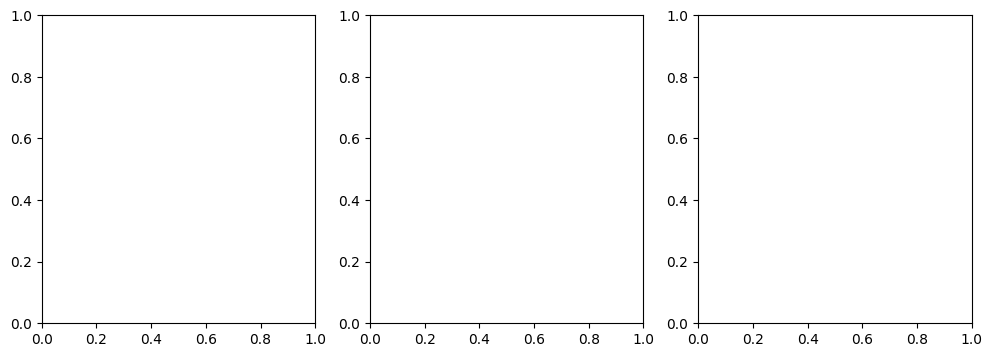

In [8]:
#plot_point(hz=0.01, ta=5.3780, E=1.0, s=0.6)
for ta in [1.0, 2.0, 4.0, 5.3780]:
    plot_point(hz=0.1233, ta=ta, E=1.0, s=0.6)  # 5.3780

In [9]:
# (hz, ta, E, s, which)
hz = '0.5000'
E = '1.0'
sf = '0.5'
which = 1
dd = {k: v for k, v in data.items() if k[0] == hz and k[2] == E and k[3] == sf and k[4] == which}

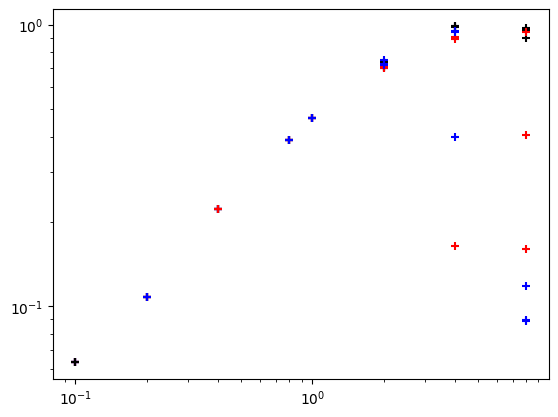

In [11]:
clrs = {'NN': 'k', 'NN+BP': 'b', 'BP': 'r'}
for k, vs in dd.items():
    ta = float(k[1])
    for v in vs:    
        plt.scatter([ta], [v['Ezz']], marker='+', color=clrs[v['which']])
#plt.ylim([0.1, 1])
plt.xscale('log')
plt.yscale('log')

In [ ]:
clrs = {'1': 'y', '2': 'g', '4': 'b', '8': 'r'}

def plot_point(hz, ta, E, s):
    if not isinstance(hz, str): hz = f"{hz:0.4f}"
    if not isinstance(ta, str): ta = f"{ta:0.4f}"
    if not isinstance(E, str):  E = f"{E:0.1f}"
    if not isinstance(s, str):  s = f"{s:0.1f}"

    fig, axs = plt.subplots(1, 3)
    fig.set_size_inches((12, 4))
    for i, val in [(0, 'Delta'), (1, 'Ezz'), (2, 'Ez')]:
        ax = axs[i]
        for which in [1, 2]:
            ind = (hz, ta, E, s, which)
            if ind in data:
                for tmp in data[ind]:
                    clr = clrs[tmp['chi']] if 'chi' in tmp else 'k'
                    mrk = 'o'
                    if 'chi' in tmp and 1 == which and 'NN' in tmp['which']:
                        mrk = 'x' 
                    if 'chi' in tmp and 1 == which and 'NN' not in tmp['which']:
                        mrk = '+' 
                    if 'chi' in tmp and 2 == which:
                        mrk = '.'                     
                    ax.scatter([1 / float(tmp["D"])], 
                            [float(tmp[val])], color=clr, marker=mrk)
            ax.set_xlabel('1 / D')
        ax.set_ylabel(val)
        ax.set_xlim([0, 0.3])
    
    dind = (hz, ta, E)
    print(dind)
    if dind in dwave:
        axs[2].plot([0, 0.3], [dwave[dind]['Ez']] * 2)
        axs[1].plot([0, 0.3], [dwave[dind]['Eng']] * 2)
    if dind in mps:
        axs[2].plot([0, 0.3], [mps[dind]['Ez']] * 2)
        axs[1].plot([0, 0.3], [mps[dind]['Ezz']] * 2)


    axs[0].set_ylim([1e-5, 10])
    axs[0].set_yscale('log')
    # axs[1].set_ylim([0, 1])
    # axs[2].set_ylim([-1, 1])

    for k, v in clrs.items():
        axs[0].scatter([1], [1], marker='x', color=v, label=f"1site NN+BP chi={k}")
        axs[0].scatter([1], [1], marker='+', color=v, label=f"1site BP chi={k}")
        axs[0].scatter([1], [1], marker='.', color=v, label=f"21site BP chi={k}")

    axs[0].scatter([1], [1], marker='o', color='k', label=f"chi=4D")
    
    axs[0].legend()
    fig.suptitle(f"hz={hz} ta={ta} E={E} s={s}")
    fig.tight_layout()
